<a href="https://colab.research.google.com/github/Tung0000/ImageClassification/blob/main/RockPaper_CNN_Aug_Drop_Batch_68_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Classification :  Rock paper scissors


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
!nvidia-smi

Tue Sep 30 11:17:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#ImageDataGenerator()

In [7]:
train_dir = '/content/drive/MyDrive/Dataset rock paper/Dataset paper rock sci/train'
val_dir = '/content/drive/MyDrive/Dataset rock paper/Dataset paper rock sci/valid'
test_dir = '/content/drive/MyDrive/Dataset rock paper/Dataset paper rock sci/test'

target_img_shape=(224, 224)

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        rotation_range=20,
        height_shift_range=0.15,
        width_shift_range=0.15,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8,1.2],
        fill_mode='nearest')

# train_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=64,
                                                 class_mode='sparse')    #sparse

Found 6455 images belonging to 2 classes.


In [9]:
val_datagen = ImageDataGenerator(rescale = 1./255,brightness_range=[0.8,1.5],zoom_range=0.3,rotation_range=20)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=64,
                                            class_mode='sparse')

Found 576 images belonging to 2 classes.


In [10]:
#np.unique()

In [11]:
x=train_set.class_indices
y=train_set.num_classes
z=train_set.classes
print(f"ใน class มีอะไรบ้าง {x}")
print(f"มีจำนวนกี่ class {y}")
print(f"array ของ label แต่ละภาพ {z}")

ใน class มีอะไรบ้าง {'images': 0, 'labels': 1}
มีจำนวนกี่ class 2
array ของ label แต่ละภาพ [0 0 0 ... 0 0 0]


In [12]:
print('Training')
id,counts = np.unique(train_set.classes,return_counts=True,)

print(f"Class ID: {id}")
print(f"Class Count: {counts}")


Training
Class ID: [0]
Class Count: [6455]


In [13]:
print('Training')
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

Training
[0]
[576]


In [14]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

images = 576


In [15]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

Validation
[0]
[576]


In [16]:
train_set.batch_size

64

#train_set ไม่ใช่ numpy array
#เวลาคุณสร้างด้วย ImageDataGenerator.flow_from_directory()
#สิ่งที่ได้คือ DirectoryIterator
#ตัวนี้ไม่ใช่ ndarray เลยไม่มี .shape

In [19]:
train_set[0][0][0].shape

(224, 224, 3)

In [18]:
val_set[0][0][0].shape

(224, 224, 3)

{'images': 0, 'labels': 1}
(64, 224, 224, 3)
(64,)
class: 0.0


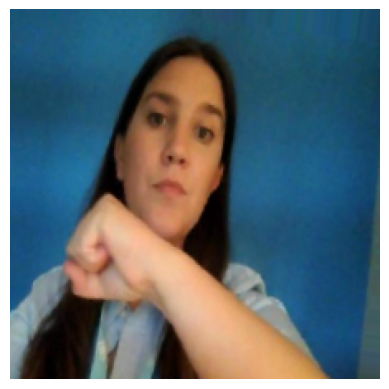

In [20]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    plt.axis('off')
    print('class:', labels_batch[0])

    break

{'images': 0, 'labels': 1}
(64, 224, 224, 3)
(64,)
class: 0.0


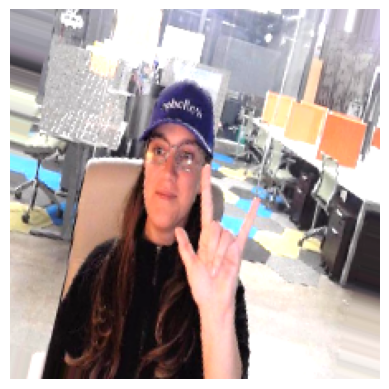

In [22]:
print(val_set.class_indices)

for image_batch, labels_batch in val_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    plt.axis('off')
    print('class:', labels_batch[0])

    break

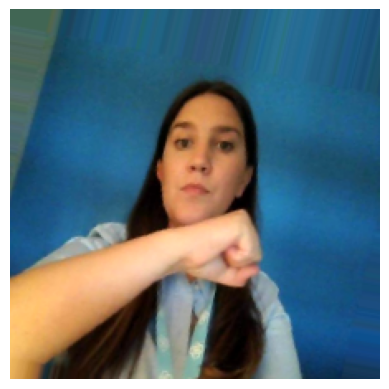

In [28]:
plt.imshow(train_set[0][0][0])
plt.axis('off')
plt.show()

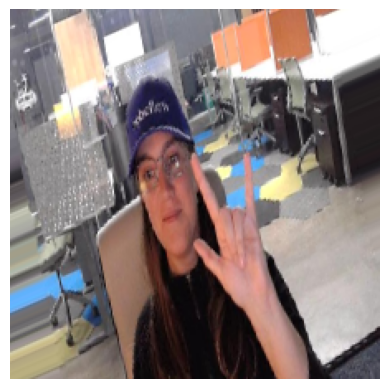

In [29]:
plt.imshow(val_set[0][0][0])
plt.axis('off')
plt.show()

In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(10,10))
    # plt.axis("off") # This turns off the axis for the overall plot, not individual subplots
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")  # Turn off axis for each subplot
    plt.tight_layout()
    plt.show()

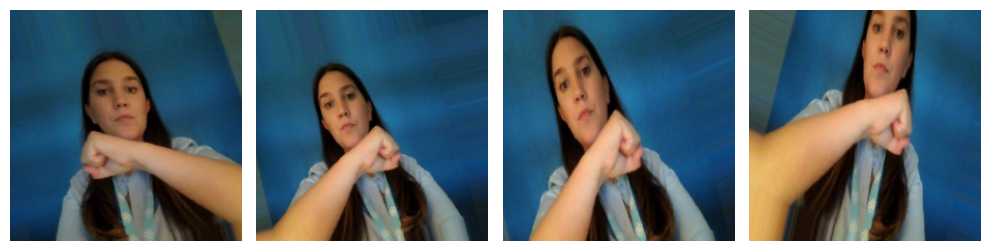

In [31]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

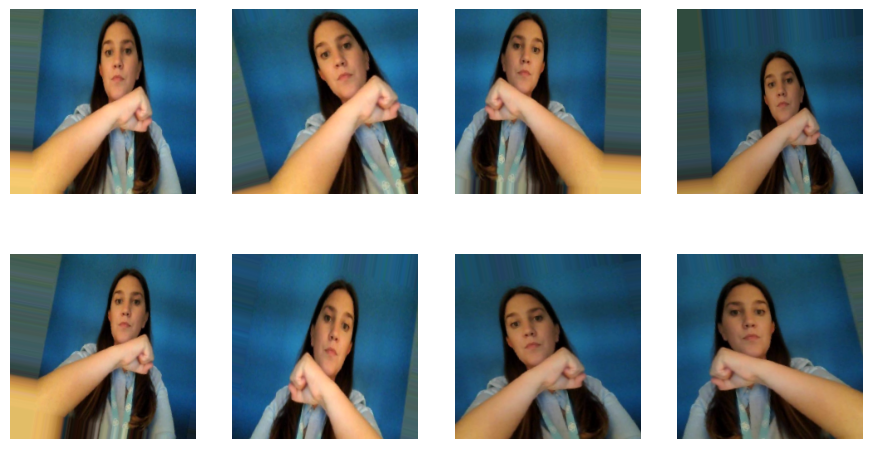

In [32]:
nplots = 8

def visual_multi(images_arr):
    fig = plt.figure(figsize=(11,9))
    for j in range(nplots):

        plt.subplot(3, 4, j+1)
        plt.imshow(images_arr[j])

        plt.axis('off')

    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

# Model

In [33]:
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(224, 224, 3)

In [34]:
class_name=2

In [35]:
#Build model fit with Datasets
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras import activations
from tensorflow.python.ops.gen_nn_ops import BatchNormWithGlobalNormalization
from tensorflow.python.keras.backend import batch_normalization
#Part of model Layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D,
Flatten, Dropout, MaxPool2D )
from keras.layers import BatchNormalization


#Deploy Library Cnn we  use Con2D
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=in_shape,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))   #ทดลองปรับ 0.1-0.5


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))   #ทดลองปรับ 0.1-0.5

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))   #ทดลองปรับ 0.1-0.5

#And finally we uer Flatten for adjust dimensional is 1
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#Use activation sorfmax,sigmoid or anything just last line
model.add(Dense(class_name, activation='sigmoid'))  #10 class

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,632,130 (21.48 MB)

 Trainable params: 5,631,682 (21.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
from tensorflow.keras.optimizers import Adam
Adam_rate = Adam(learning_rate=0.0005) # Reduced learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam_rate, metrics=['accuracy'])  #loss='sparse_categorical_crossentropy'

In [38]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data=val_set, epochs=30, verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2584s 25s/step - accuracy: 0.9823 - loss: 0.0403 - val_accuracy: 0.0000e+00 - val_loss: 280.4615
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 304.8308
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 242.7046
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0087 - val_loss: 172.7994
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1771 - val_loss: 108.7795
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.3802 - val_loss: 70.2298
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4896 - val_loss: 56.2094
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 136s 1s

##การทำลองทำ Regularization

###กราฟแสดงผล Model CNN_Aug_Drop_Batch

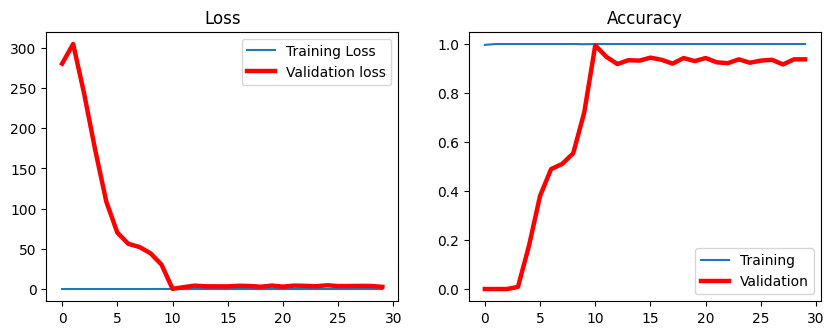

In [40]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

Evaluation CNN_Aug_Drop_Batch

In [41]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}' .format(acc[1]))

score = 0.924


In [ ]:
acc_train=model.evaluate(train_set,steps=len(train_set),verbose=0)
print('score = {:.3f}' .format(acc_train[1]))

In [ ]:
plt.imshow(train_set[0][0][0])
plt.show()

In [ ]:
model.predict(val_set[0][0][0])